y = 0, it's a 'non-cat' picture.


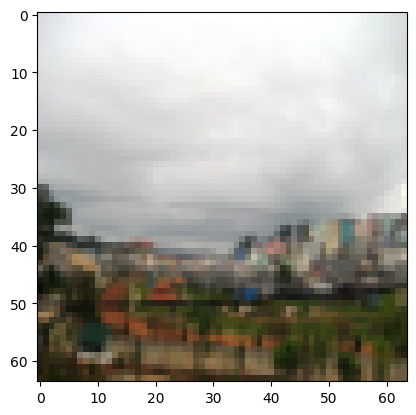

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load dataset
def load_dataset():
    train_dataset = h5py.File('Datasets_9/train_catvnoncat.h5', "r")
    test_dataset = h5py.File('Datasets_9/test_catvnoncat.h5', "r")
    return (
        np.array(train_dataset["train_set_x"][:]),
        np.array(train_dataset["train_set_y"][:]),
        np.array(test_dataset["test_set_x"][:]),
        np.array(test_dataset["test_set_y"][:]),
        np.array(test_dataset["list_classes"][:])
    )

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Display an image and label
index = 17
plt.imshow(train_set_x_orig[index])
label = "cat" if train_set_y[index] == 1 else "non-cat"
print(f"y = {train_set_y[index]}, it's a '{label}' picture.")

In [17]:
import numpy as np
import h5py
from sklearn.linear_model import LogisticRegression

# Loading the data (cat/non-cat)
train_dataset = h5py.File('Datasets_9/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # train set labels

test_dataset = h5py.File('Datasets_9/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # test set labels

classes = np.array(test_dataset["list_classes"][:])  # the list of classes

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Dataset dimensions:")
print("Number of training examples: m_train =", m_train)
print("Number of testing examples: m_test =", m_test)
print("Height/Width of each image: num_px =", num_px)
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape:", train_set_x_orig.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_x shape:", test_set_x_orig.shape)
print("test_set_y shape:", test_set_y.shape)

# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape:", train_set_x_flatten.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_x_flatten shape:", test_set_x_flatten.shape)
print("test_set_y shape:", test_set_y.shape)
print("sanity check after reshaping:", train_set_x_flatten[0:5, 0])

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(train_set_x.T, train_set_y.T.ravel())

print("Logistic Regression Coefficients Shape:", lr.coef_.shape)
print("Logistic Regression Coefficients:", lr.coef_)
print("Logistic Regression Intercept:", lr.intercept_)

Y_prediction = lr.predict(test_set_x.T)
print("Y_prediction shape:", Y_prediction.shape)

accuracy = 100 - np.mean(np.abs(Y_prediction - test_set_y)) * 100
print("Test accuracy: {} %".format(accuracy))

Dataset dimensions:
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]
Logistic Regression Coefficients Shape: (1, 12288)
Logistic Regression Coefficients: [[ 0.08090671 -0.10438659 -0.01683361 ... -0.05612977 -0.12381665
   0.17725205]]
Logistic Regression Intercept: [-0.10425064]
Y_prediction shape: (50,)
Test accuracy: 72.0 %


C:\Users\Vaibhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
